In [1]:
#Paquetes para obtener información de una URL (URIParser), Visualizador (VegaLite), manejo de los datos (VegaDatasets)
using Pkg
Pkg.add(["URIParser", "VegaLite"])
using URIParser, VegaLite

  Updating registry at `C:\Users\joc_h\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `C:\Users\joc_h\.julia\environments\v1.0\Project.toml`
 [no changes]
  Updating `C:\Users\joc_h\.julia\environments\v1.0\Manifest.toml`
 [no changes]


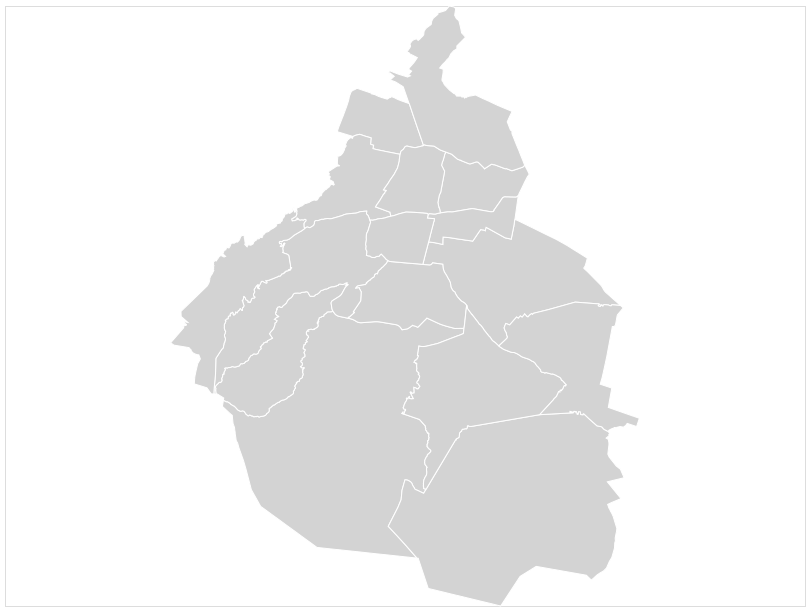

In [3]:
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape,
        fill=:lightgrey,
        stroke=:white
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/alcaldias.json"),
        format={
            typ=:topojson,
            feature=:alcaldias
        }
    },
    projection={
        typ=:albers
    }
)

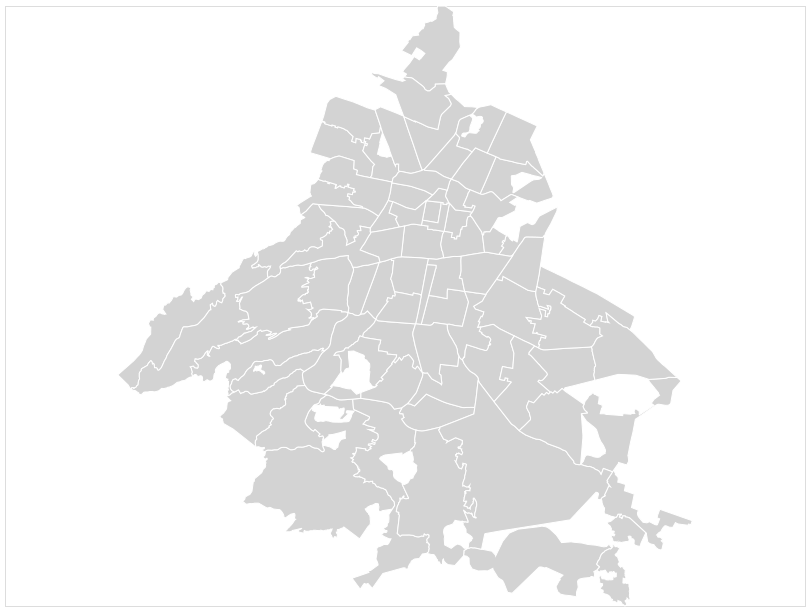

In [10]:
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape,
        fill=:lightgrey,
        stroke=:white
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/Tesis/master/MapaCL-CDMX/sectorescdmx.json"),
        format={
            typ=:topojson,
            feature=:"sectorescdmx-polygon"
        }     
    
    },
    projection={
        typ=:albers
    }
)

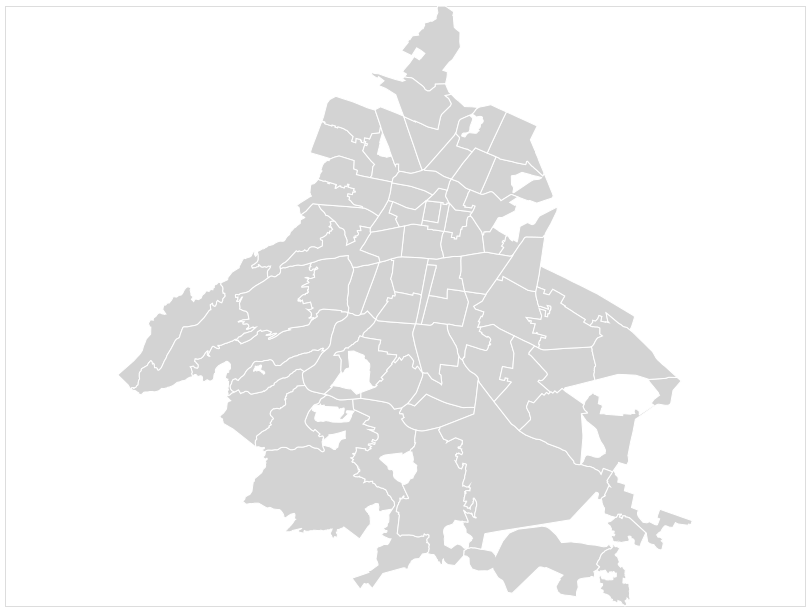

In [13]:
@vlplot(width=800, height=600) + 
@vlplot(
    mark={ 
        :geoshape,
        fill=:lightgrey,
        stroke=:white
    },
    data={
        url=URI("https://raw.githubusercontent.com/tonallimunoz/CT/master/OGRGeoJSON.json"),
        format={
            typ=:topojson,
            feature=:"OGRGeoJSON"
        }     
    
    },
    projection={
        typ=:albers
    }
)